# 1. Import Data

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Print current directory
print(os.getcwd())

# Change the working directory to the specified path
os.chdir('/content/drive/MyDrive/Colab Notebooks')
print(os.getcwd())

# Load a CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_BUS210Bclass/concert_sales_data.csv')



# Display the first few rows of the DataFrame
df.head()

Mounted at /content/drive
/content
/content/drive/MyDrive/Colab Notebooks


,Date,City,Country,Venue_Capacity,Tickets_Sold,Ticket_Price,Total_Revenue,Artist
0,2022-01-02,Chicago,USA,33242,25243,100.831545,2.545291e+06,Beyoncé
1,2022-01-09,New York,USA,23455,17811,66.684751,1.187722e+06,Beyoncé
2,2022-01-16,Houston,USA,26521,20139,127.905102,2.575881e+06,Beyoncé
3,2022-01-23,Houston,USA,29123,22115,136.493330,3.018550e+06,Taylor Swift
4,2022-01-30,Houston,USA,30179,22917,91.139672,2.088648e+06,Taylor Swift


# 2. Data preprocessing

2.1. Check for missing values

In [24]:
# Create a copy of the DataFrame
sales_df = df.copy()

# Calculates the number of missing values in each column
sales_df.isna().sum()

Date              0
City              0
Country           0
Venue_Capacity    0
Tickets_Sold      0
Ticket_Price      0
Total_Revenue     0
Artist            0
dtype: int64

*Notes: The result shows zero missing values in all columns, indicating that the dataset is clean in terms of missing data.

2.2. Convert the 'Date' column to datetime format

In [25]:
# Convert the 'Date' column to datetime format
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Verify the change by checking the data type of each column
print(sales_df.dtypes)


Date              datetime64[ns]
City                      object
Country                   object
Venue_Capacity             int64
Tickets_Sold               int64
Ticket_Price             float64
Total_Revenue            float64
Artist                    object
dtype: object


2.3. Check for any duplicates

In [ ]:
# Check for duplicate rows
duplicates = sales_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# If there are duplicates, remove them
if duplicates.sum() > 0:
    sales_df = sales_df.drop_duplicates()
    print("Duplicates have been removed.")
else:
    print("No duplicates found.")


Number of duplicate rows: 0
No duplicates found.


*Notes: The output indicates that there were no duplicate rows found in the DataFrame. This result is excellent as it confirms the uniqueness of each concert entry in your dataset, implying that each row represents a distinct event without any repetitions.

# 3. Exploratory Data Analysis (EDA):

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress


3.1. Ticket sales and revenue over time

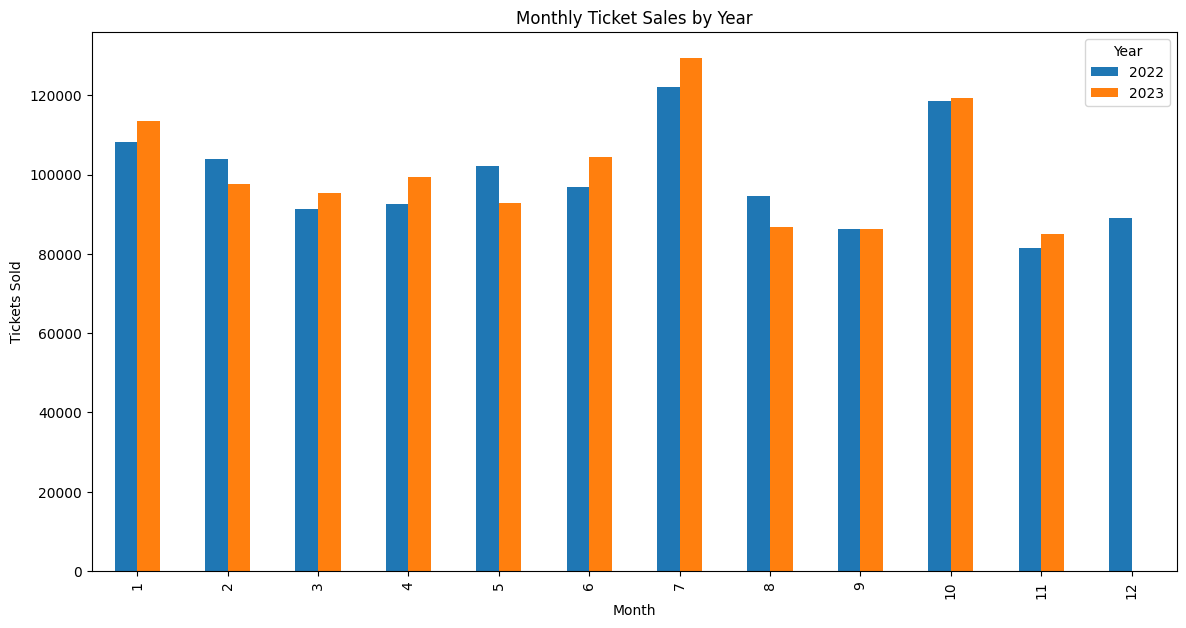

In [26]:
# Sales by Month:

# Ensure 'Date' is a datetime type
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Set 'Date' as the index
sales_df.set_index('Date', inplace=True)

# Adding year and month columns derived from the index
sales_df['Year'] = sales_df.index.year
sales_df['Month'] = sales_df.index.month

# Grouping by year and month
year_month_sales = sales_df.groupby(['Year', 'Month']).agg({
    'Tickets_Sold': 'sum',
    'Total_Revenue': 'sum'
}).unstack(level=0)

# Plotting the data for 'Tickets_Sold'
if 'Tickets_Sold' in year_month_sales.columns:
    year_month_sales['Tickets_Sold'].plot(kind='bar', figsize=(14, 7))
    plt.title('Monthly Ticket Sales by Year')
    plt.xlabel('Month')
    plt.ylabel('Tickets Sold')
    plt.legend(title='Year')
    plt.show()
else:
    print("No 'Tickets_Sold' data available for plotting.")


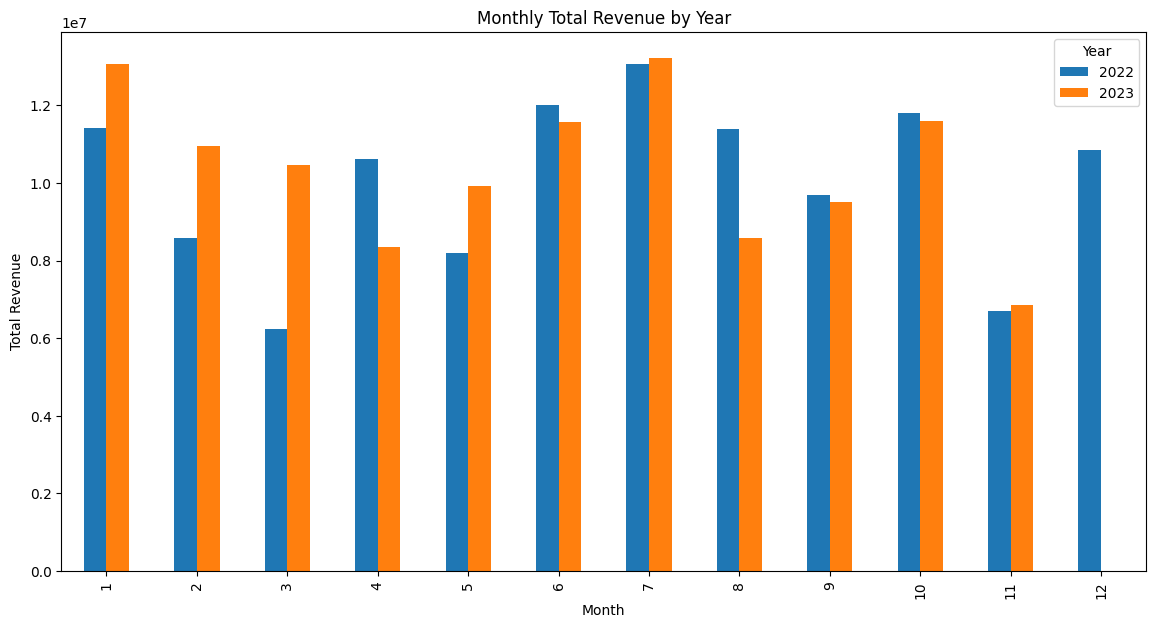

In [35]:
# Plotting the data for 'Tickets_Sold'
if 'Total_Revenue' in year_month_sales.columns:
    year_month_sales['Total_Revenue'].plot(kind='bar', figsize=(14, 7))
    plt.title('Monthly Total Revenue by Year')
    plt.xlabel('Month')
    plt.ylabel('Total Revenue')
    plt.legend(title='Year')
    plt.show()
else:
    print("No 'Total_Revenue' data available for plotting.")


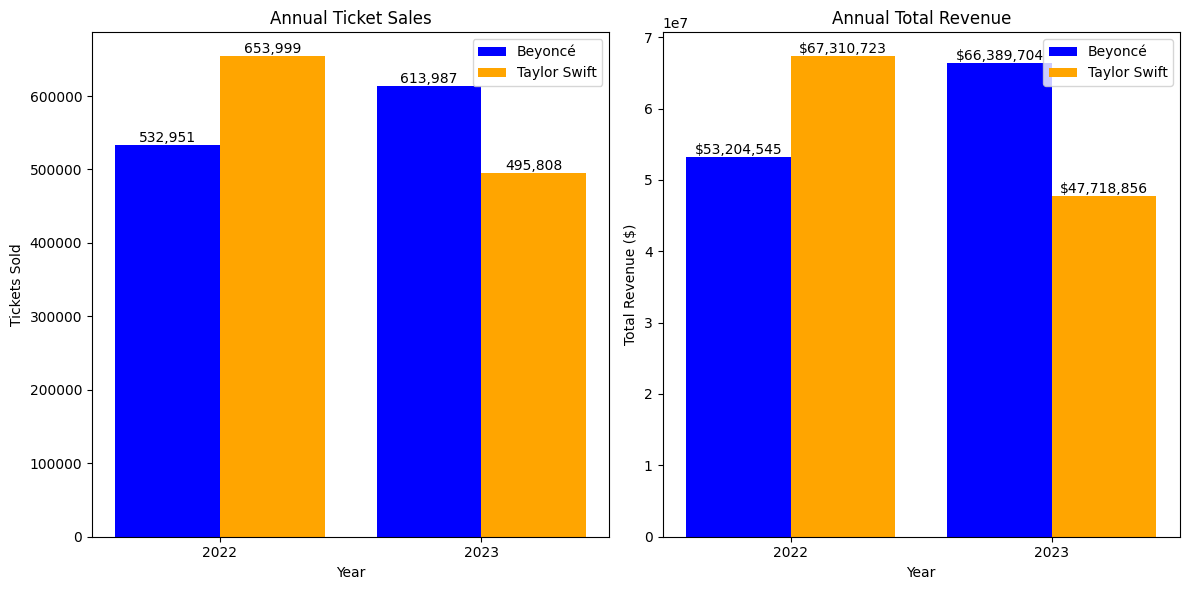

In [39]:

# Resample data annually and calculate the sum of tickets sold and total revenue, grouping by artist
annual_data = sales_df.groupby('Artist').resample('Y').agg({'Tickets_Sold': 'sum', 'Total_Revenue': 'sum'}).reset_index()
annual_data['Year'] = annual_data['Date'].dt.year  # Extract year for plotting

# Separate data for each artist for easier plotting
beyonce_data = annual_data[annual_data['Artist'] == 'Beyoncé']
taylor_data = annual_data[annual_data['Artist'] == 'Taylor Swift']

# Creating the plots for visual comparison
plt.figure(figsize=(12, 6))

# Plot for Annual Ticket Sales
plt.subplot(1, 2, 1)
width = 0.4  # the width of the bars
bars1 = plt.bar(beyonce_data['Year'] - width/2, beyonce_data['Tickets_Sold'], width=width, label='Beyoncé', color='blue')
bars2 = plt.bar(taylor_data['Year'] + width/2, taylor_data['Tickets_Sold'], width=width, label='Taylor Swift', color='orange')
plt.title('Annual Ticket Sales')
plt.xlabel('Year')
plt.ylabel('Tickets Sold')
plt.xticks([2022, 2023])  # Ensure years are displayed on x-axis
plt.legend()

# Adding text labels above the bars in the first plot
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', ha='center', va='bottom')

# Plot for Annual Total Revenue
plt.subplot(1, 2, 2)
bars3 = plt.bar(beyonce_data['Year'] - width/2, beyonce_data['Total_Revenue'], width=width, label='Beyoncé', color='blue')
bars4 = plt.bar(taylor_data['Year'] + width/2, taylor_data['Total_Revenue'], width=width, label='Taylor Swift', color='orange')
plt.title('Annual Total Revenue')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($)')
plt.xticks([2022, 2023])
plt.legend()

# Adding text labels above the bars in the second plot
for bars in [bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'${int(yval):,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

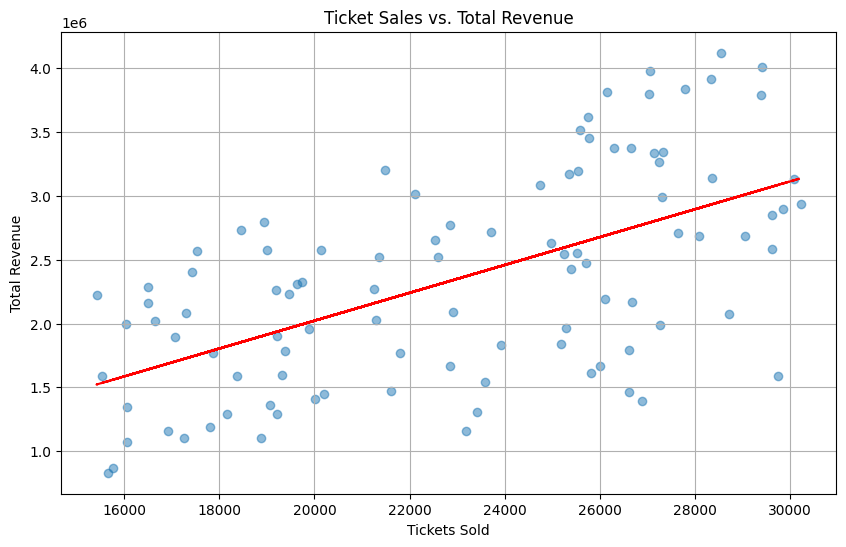

In [ ]:
# Tickets sold vs. Revenue:

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sales_df['Tickets_Sold'], sales_df['Total_Revenue'], alpha=0.5)  # added alpha for better visualization

# Calculating the trendline
z = np.polyfit(sales_df['Tickets_Sold'], sales_df['Total_Revenue'], 1)
p = np.poly1d(z)
plt.plot(sales_df['Tickets_Sold'], p(sales_df['Tickets_Sold']), "r--")  # red dashed trendline

# Adding titles and labels
plt.title('Ticket Sales vs. Total Revenue')
plt.xlabel('Tickets Sold')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


3.2. Ticket sales and revenue between Beyonce and Taylor Swift

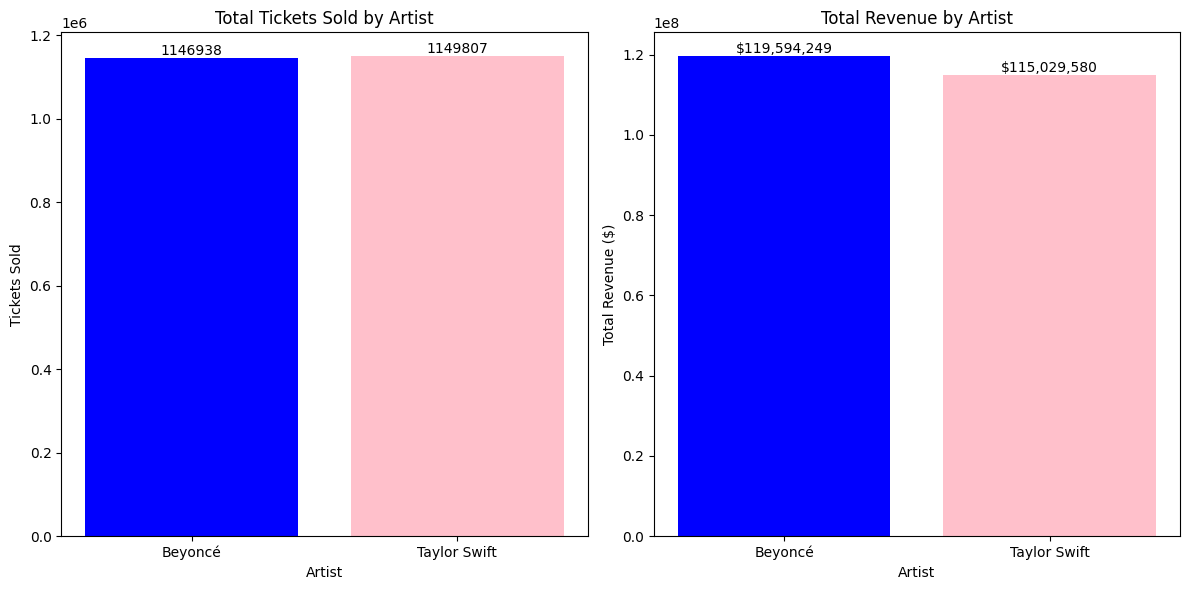

In [ ]:
# Group data by artist and sum up tickets sold and total revenue
artist_summary = sales_df.groupby('Artist').agg({
    'Tickets_Sold': 'sum',
    'Total_Revenue': 'sum'
}).reset_index()

# Creating bar charts to compare total tickets sold and total revenue
plt.figure(figsize=(12, 6))

# Total Tickets Sold by Artist
ax1 = plt.subplot(1, 2, 1)
bars1 = ax1.bar(artist_summary['Artist'], artist_summary['Tickets_Sold'], color=['blue', 'pink'])
plt.title('Total Tickets Sold by Artist')
plt.xlabel('Artist')
plt.ylabel('Tickets Sold')

# Annotate each bar with value
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')  # Adjust alignment as necessary

# Total Revenue by Artist
ax2 = plt.subplot(1, 2, 2)
bars2 = ax2.bar(artist_summary['Artist'], artist_summary['Total_Revenue'], color=['blue', 'pink'])
plt.title('Total Revenue by Artist')
plt.xlabel('Artist')
plt.ylabel('Total Revenue ($)')

# Annotate each bar with value
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, f'${int(yval):,}', va='bottom', ha='center')  # Format as currency

plt.tight_layout()
plt.show()


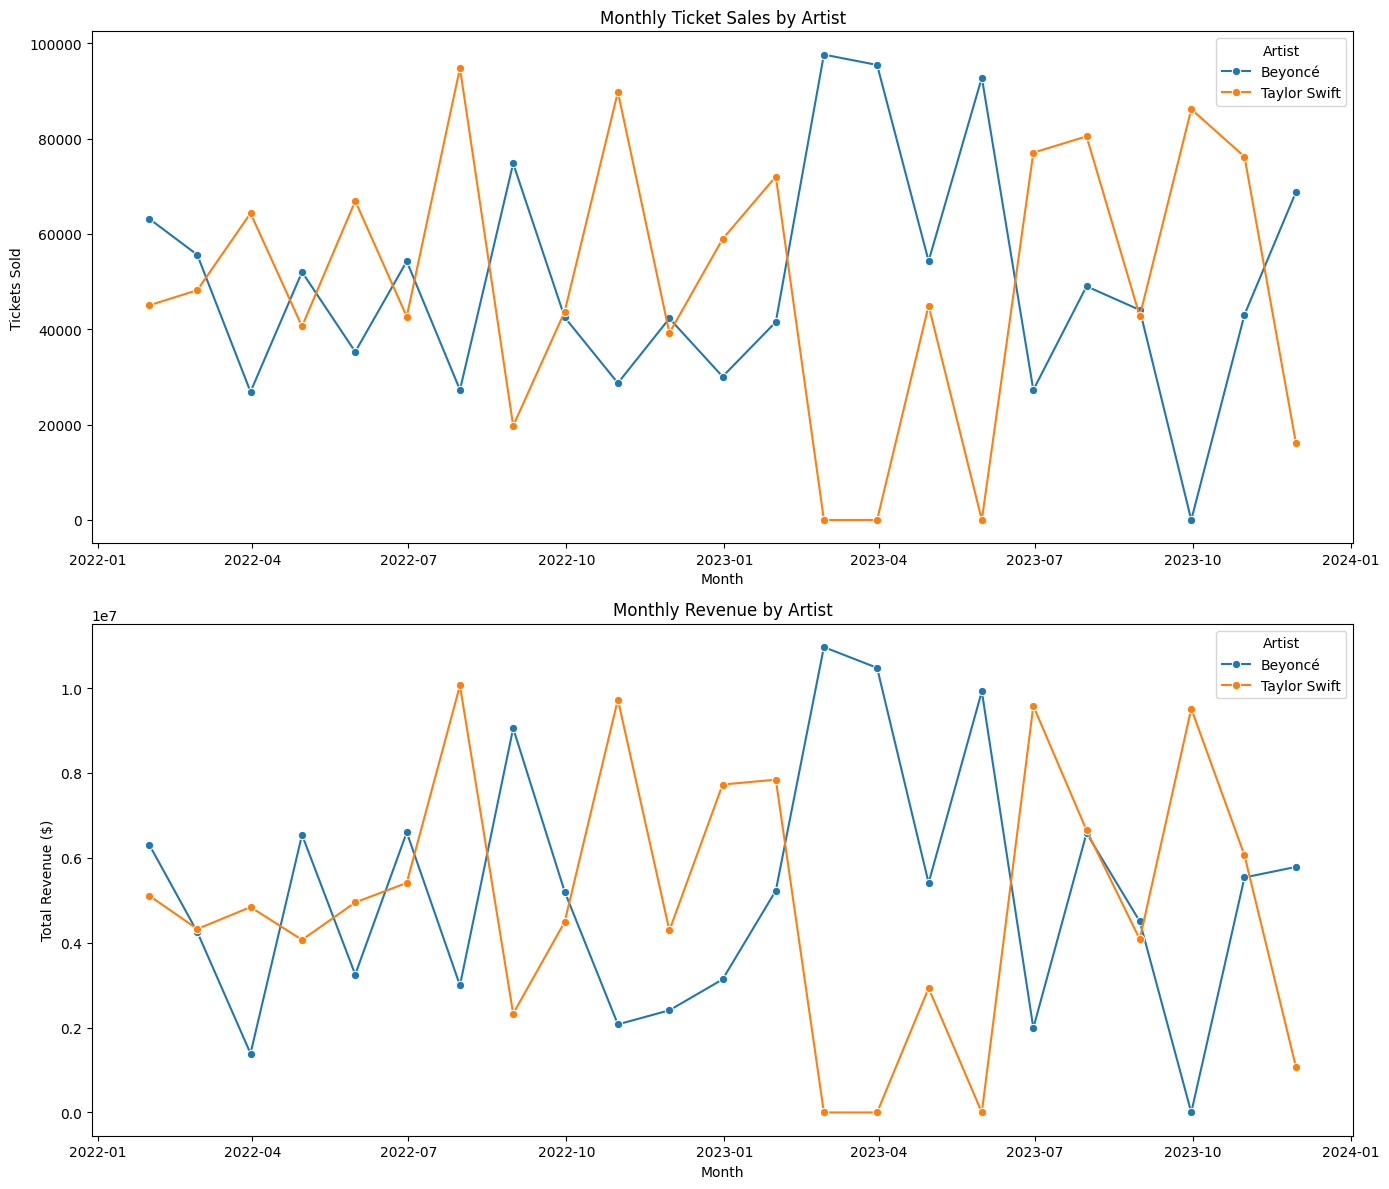

In [ ]:
# Ensure the index is in datetime format, convert if necessary
if not pd.api.types.is_datetime64_any_dtype(sales_df.index):
    sales_df.set_index(pd.to_datetime(sales_df.index), inplace=True)

# Group data by artist and resample by month, then aggregate
monthly_artist_data = sales_df.groupby('Artist').resample('M').agg({
    'Tickets_Sold': 'sum',
    'Total_Revenue': 'sum'
}).reset_index()

# Change 'Date' to datetime to properly sort and manage
monthly_artist_data['Date'] = pd.to_datetime(monthly_artist_data['Date'])

# Plotting monthly data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Tickets Sold by Month and Artist
sns.lineplot(data=monthly_artist_data, x='Date', y='Tickets_Sold', hue='Artist', ax=axes[0], marker='o')
axes[0].set_title('Monthly Ticket Sales by Artist')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Tickets Sold')

# Total Revenue by Month and Artist
sns.lineplot(data=monthly_artist_data, x='Date', y='Total_Revenue', hue='Artist', ax=axes[1], marker='o')
axes[1].set_title('Monthly Revenue by Artist')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Revenue ($)')

plt.tight_layout()
plt.show()


3.3. Top-performing locations for each artist

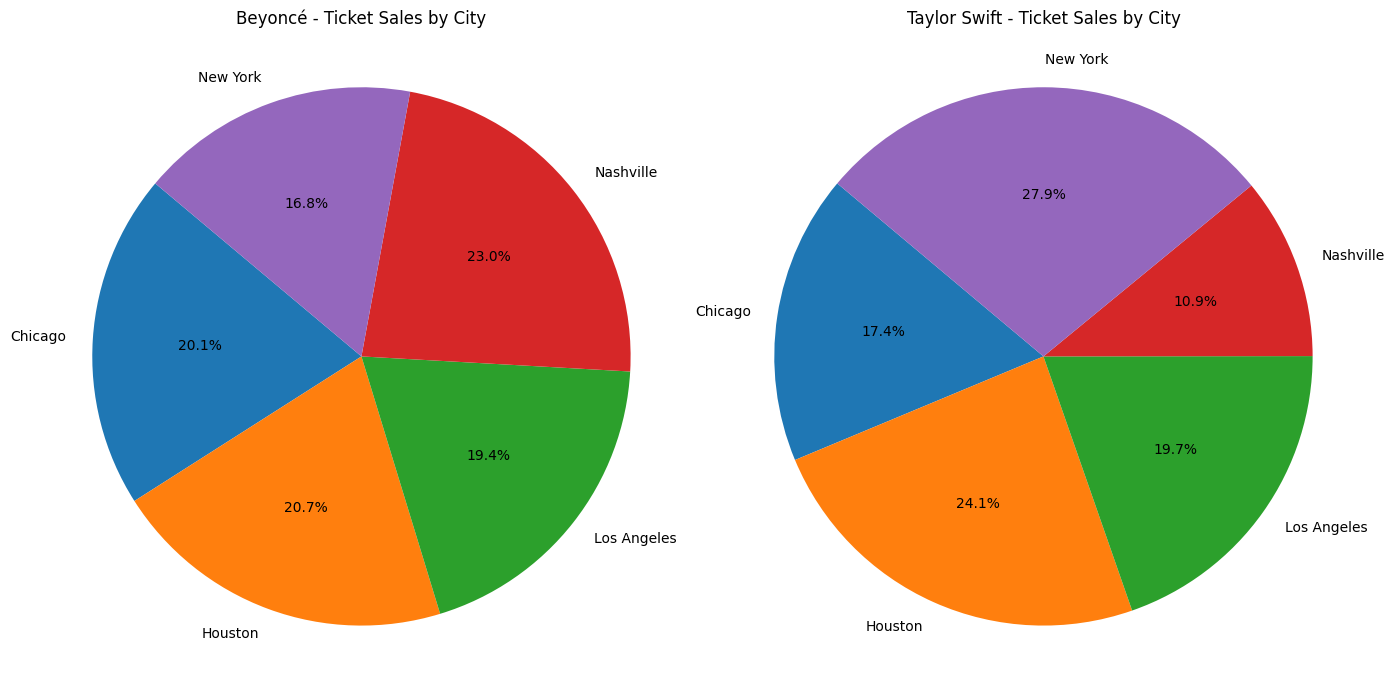

In [27]:
# Filter and group data by City and Artist for total ticket sales
city_artist_sales = sales_df.groupby(['City', 'Artist']).agg({'Tickets_Sold':'sum'}).reset_index()

# Separate the data for Beyoncé and Taylor Swift
beyonce_data = city_artist_sales[city_artist_sales['Artist'] == 'Beyoncé']
taylor_swift_data = city_artist_sales[city_artist_sales['Artist'] == 'Taylor Swift']

# Create a figure to hold the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plotting the pie chart for Beyoncé
ax1.pie(beyonce_data['Tickets_Sold'], labels=beyonce_data['City'], autopct='%1.1f%%', startangle=140)
ax1.set_title('Beyoncé - Ticket Sales by City')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plotting the pie chart for Taylor Swift
ax2.pie(taylor_swift_data['Tickets_Sold'], labels=taylor_swift_data['City'], autopct='%1.1f%%', startangle=140)
ax2.set_title('Taylor Swift - Ticket Sales by City')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.tight_layout()
plt.show()

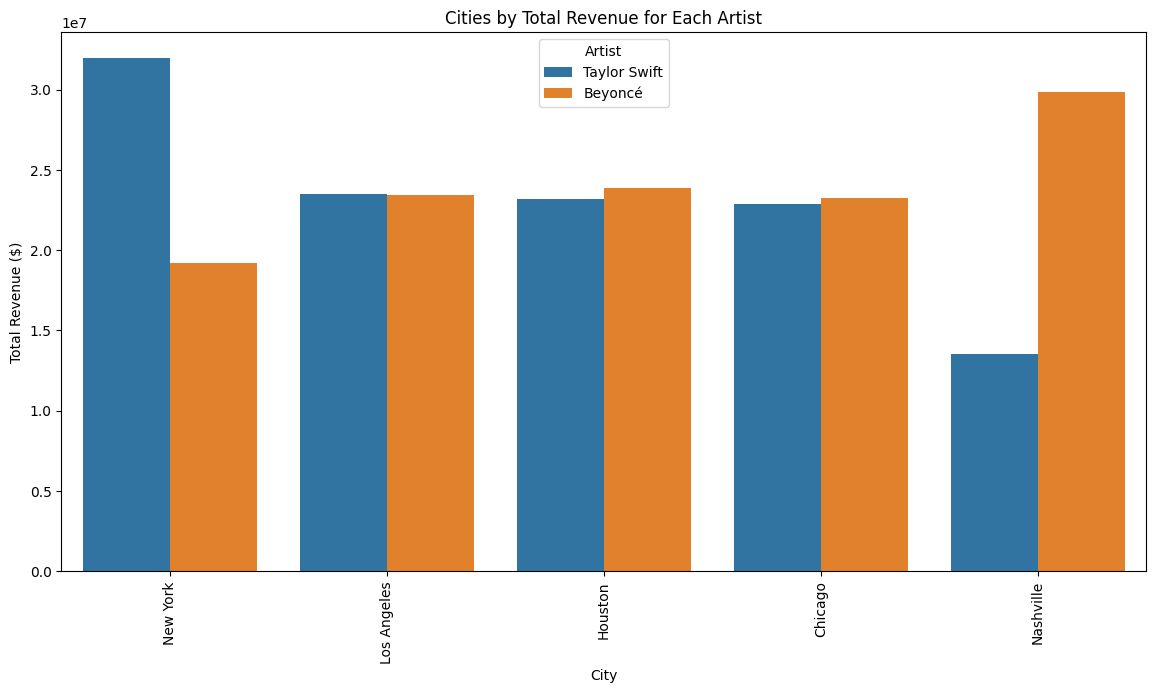

In [ ]:
# Total Revenue by City:

# Group by 'Artist' and 'City', and sum the 'Tickets_Sold' and 'Total_Revenue'
city_performance = sales_df.groupby(['Artist', 'City']).agg({
    'Tickets_Sold': 'sum',
    'Total_Revenue': 'sum'
}).sort_values(by=['Artist', 'Total_Revenue'], ascending=False).reset_index()

# Visualization of all cities for each artist by revenue
plt.figure(figsize=(14, 7))
sns.barplot(x='City', y='Total_Revenue', hue='Artist', data=city_performance)
plt.title('Cities by Total Revenue for Each Artist')
plt.xlabel('City')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=90)  # Rotate city names for better readability, may need to adjust for visibility
plt.show()


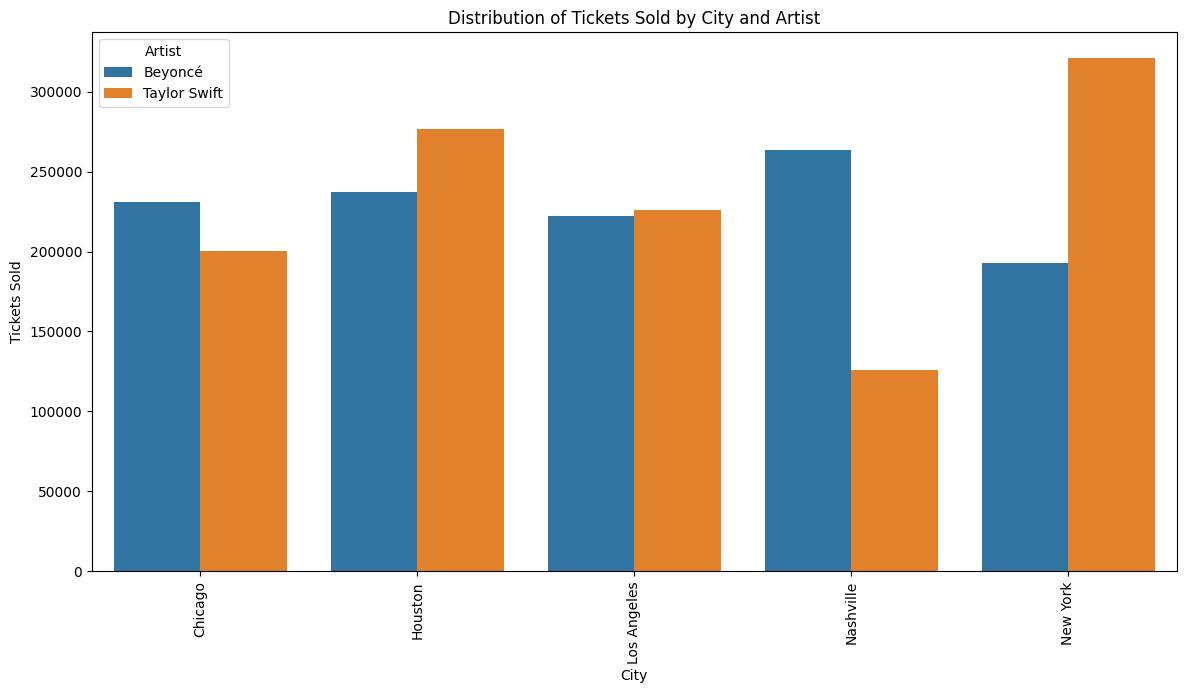

In [ ]:
# Tickets Sold by City:


# Group data by artist and city, summing the tickets sold
tickets_by_city_artist = sales_df.groupby(['Artist', 'City']).agg({
    'Tickets_Sold': 'sum'
}).reset_index()

# Visualization of ticket distribution
plt.figure(figsize=(14, 7))
sns.barplot(x='City', y='Tickets_Sold', hue='Artist', data=tickets_by_city_artist)
plt.title('Distribution of Tickets Sold by City and Artist')
plt.xlabel('City')
plt.ylabel('Tickets Sold')
plt.xticks(rotation=90)  # Rotate for better readability
plt.show()


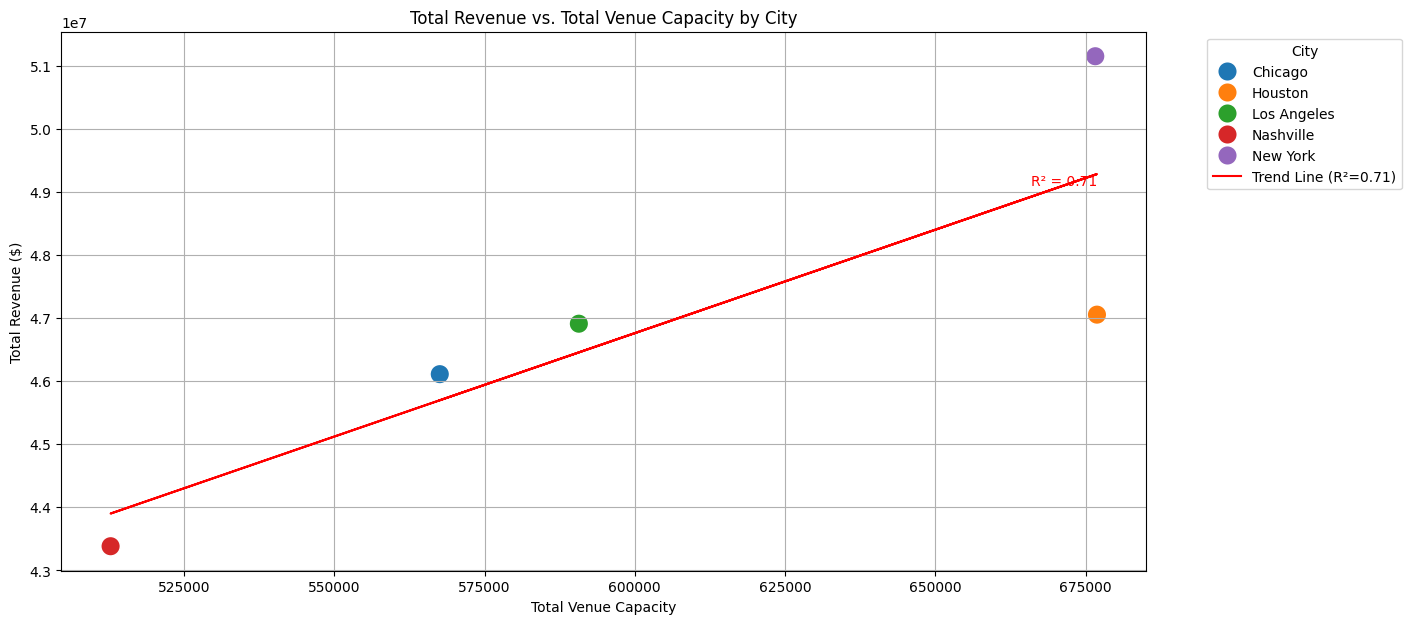

In [34]:

# Aggregate total revenue and total venue capacity by city
city_performance = sales_df.groupby('City').agg({
    'Total_Revenue': 'sum',
    'Venue_Capacity': 'sum'
}).reset_index()

# Visualization
plt.figure(figsize=(14, 7))
# Plot scatter with larger markers
scatter = sns.scatterplot(x='Venue_Capacity', y='Total_Revenue', data=city_performance, hue='City', s=200)

# Calculate the trend line (linear regression)
slope, intercept, r_value, p_value, std_err = linregress(city_performance['Venue_Capacity'], city_performance['Total_Revenue'])

# Create line equation
line = slope * city_performance['Venue_Capacity'] + intercept

# Plot the line
plt.plot(city_performance['Venue_Capacity'], line, 'r-', label=f'Trend Line (R²={r_value**2:.2f})')  # Red line for visibility

# Add R² value to the plot
plt.text(x=max(city_performance['Venue_Capacity']), y=max(line),
         s=f'R² = {r_value**2:.2f}',
         color='red', ha='right', va='top')  # Position text at the end of the trend line

plt.title('Total Revenue vs. Total Venue Capacity by City')
plt.xlabel('Total Venue Capacity')
plt.ylabel('Total Revenue ($)')

# Manually adjust the legend to only show city names and the trend line
handles, labels = scatter.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: x[1])  # Sort by label if needed
handles, labels = zip(*sorted_handles_labels)
plt.legend(handles, labels, title='City', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.grid(True)
plt.show()

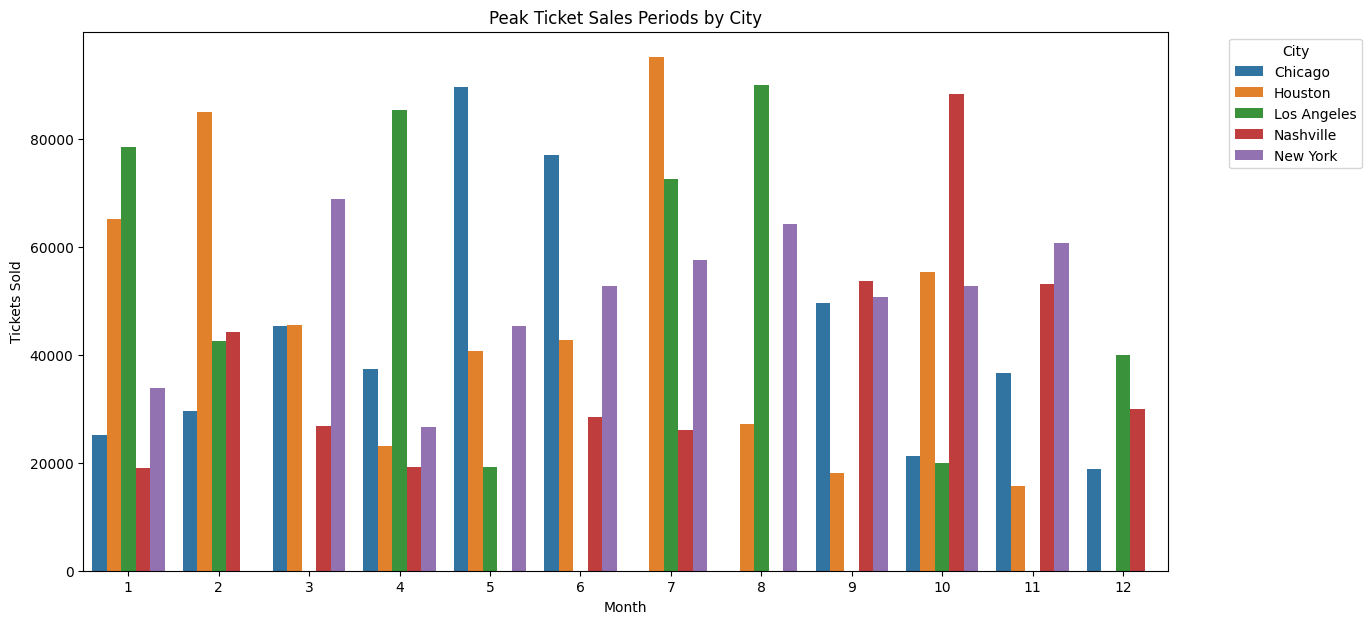

In [ ]:
# Extract month from date to analyze seasonal trends
sales_df['Month'] = sales_df.index.month

# Group by city and month, then sum tickets sold
peak_sales_by_city = sales_df.groupby(['City', 'Month']).agg({
    'Tickets_Sold': 'sum'
}).reset_index()

# Visualization of peak sales periods
plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Tickets_Sold', hue='City', data=peak_sales_by_city)
plt.title('Peak Ticket Sales Periods by City')
plt.xlabel('Month')
plt.ylabel('Tickets Sold')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend placement
plt.show()


3.4. Ticket prices and the number of tickets sold

<ipython-input-40-5382f262817b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='Artist', y='Ticket_Price', data=sales_df, palette=['blue', 'pink'])


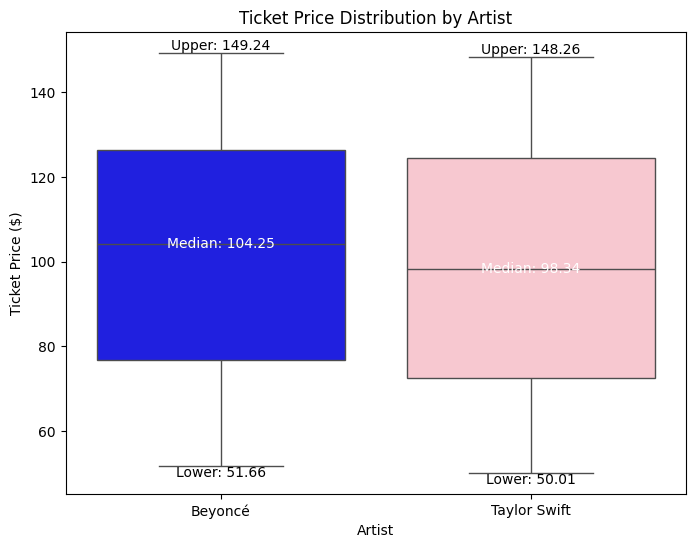

In [40]:

# Ticket Price Distribution by Artist
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(x='Artist', y='Ticket_Price', data=sales_df, palette=['blue', 'pink'])
plt.title('Ticket Price Distribution by Artist')
plt.xlabel('Artist')
plt.ylabel('Ticket Price ($)')

# Adding annotations for upper whisker, lower whisker, and median
for i, artist in enumerate(sales_df['Artist'].unique()):
    artist_data = sales_df[sales_df['Artist'] == artist]['Ticket_Price']
    upper_whisker = artist_data.quantile(0.75) + (1.5 * (artist_data.quantile(0.75) - artist_data.quantile(0.25)))
    lower_whisker = artist_data.quantile(0.25) - (1.5 * (artist_data.quantile(0.75) - artist_data.quantile(0.25)))
    median = artist_data.median()

    # Ensure the whiskers do not go beyond the actual data range
    upper_whisker = min(upper_whisker, artist_data.max())
    lower_whisker = max(lower_whisker, artist_data.min())

    plt.text(i, upper_whisker, f'Upper: {upper_whisker:.2f}', ha='center', va='bottom')
    plt.text(i, lower_whisker, f'Lower: {lower_whisker:.2f}', ha='center', va='top')
    plt.text(i, median, f'Median: {median:.2f}', ha='center', va='center', color='white')

plt.show()

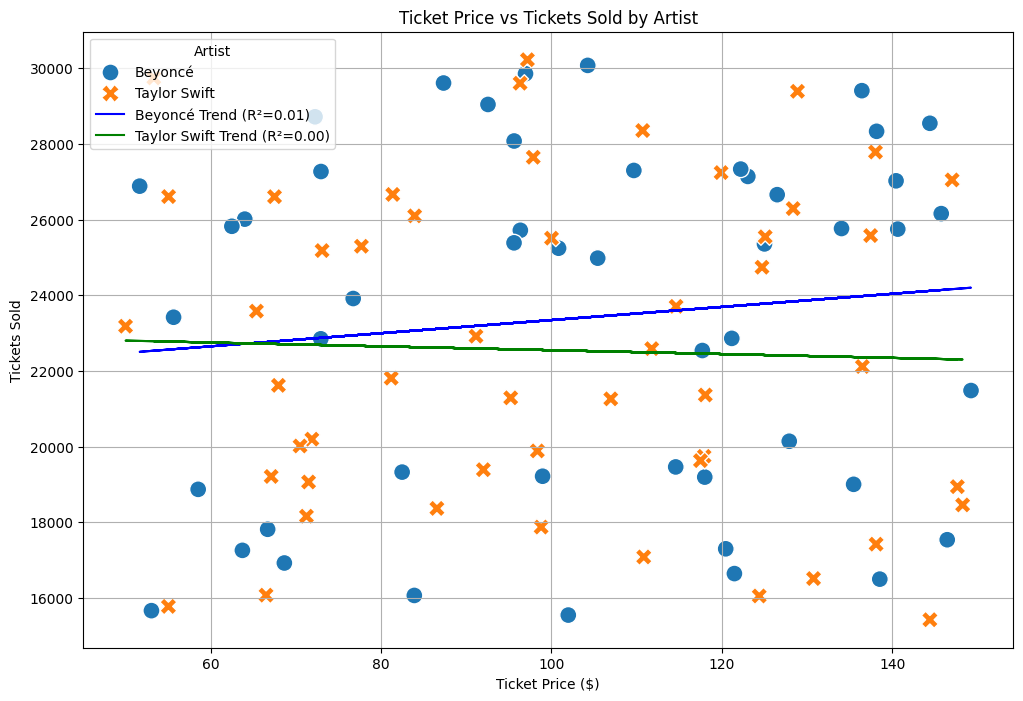

In [30]:

# Scatter plot with different colors and markers for each artist
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='Ticket_Price', y='Tickets_Sold', data=sales_df, hue='Artist', style='Artist', s=150)

# Calculating and adding trend lines with correlation coefficients
artists = sales_df['Artist'].unique()
colors = ['blue', 'green']  # Change or expand based on your actual artists and preferences
for artist, color in zip(artists, colors):
    # Filter data for the artist
    artist_data = sales_df[sales_df['Artist'] == artist]
    # Calculate the trend line (linear regression)
    slope, intercept, r_value, p_value, std_err = linregress(artist_data['Ticket_Price'], artist_data['Tickets_Sold'])
    # Create line equation
    line = slope * artist_data['Ticket_Price'] + intercept
    # Plot the line
    plt.plot(artist_data['Ticket_Price'], line, color=color, label=f'{artist} Trend (R²={r_value**2:.2f})')

plt.title('Ticket Price vs Tickets Sold by Artist')
plt.xlabel('Ticket Price ($)')
plt.ylabel('Tickets Sold')
plt.legend(title='Artist')
plt.grid(True)
plt.show()


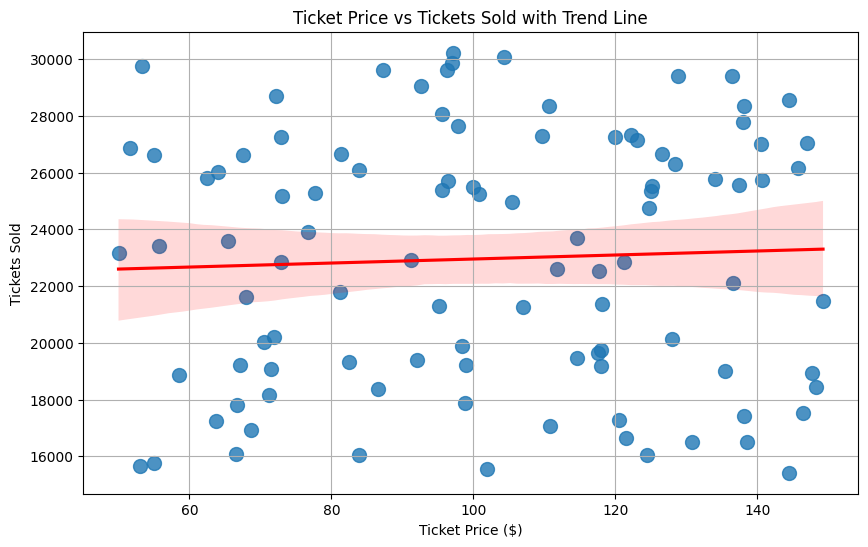

In [ ]:
# Trend Line:

# Using seaborn's regplot to add a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Ticket_Price', y='Tickets_Sold', data=sales_df, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Ticket Price vs Tickets Sold with Trend Line')
plt.xlabel('Ticket Price ($)')
plt.ylabel('Tickets Sold')
plt.grid(True)
plt.show()
